In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Make sure you pip3 install beautifulsoup4, requests and pandas 

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  Boarding was difficult caus...
1  ✅ Trip Verified |  Boarding started with a del...
2  ✅ Trip Verified |  Absolutely horrible custome...
3  Not Verified |  BA is not what it used to be! ...
4  ✅ Trip Verified |  BA First, it's not even the...

In [10]:
df.to_csv("../Dataset/BA_reviews.csv")

In [11]:
# Cleaning the data:
# Check for missing values:

print(df.isnull().sum())
# there are no missing values 

reviews    0
dtype: int64


In [12]:
# remove the parts before the | in the reviews column:

df.reviews = df.reviews.str.split('|', expand=True) [1]

In [13]:
df
# Check df has been updated

reviews
0      Boarding was difficult caused by vast majori...
1      Boarding started with a delay of some 20 min...
2      Absolutely horrible customer service - will ...
3      BA is not what it used to be! As much as I l...
4      BA First, it's not even the best business cl...
..                                                 ...
995    London to Vancouver. Check in agent very hel...
996   The First Class zone at Heathrow T5 and the C...
997    I had a miserable experience in first class ...
998    Leeds Bradford to Las Vegas via Heathrow. Cu...
999    Dallas to London Heathrow in First Class. Th...

[1000 rows x 1 columns]

In [14]:
df.to_csv("../Dataset/BA_reviews.csv")
# update the df in the saved dataset

In [15]:
# cleaning the text:
# import regular expressions module to search for text
import re 

# define a function to clean the data:
def clean(text):
    # remove special characters and numbers keeping only A-Z and a-z
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Apply the clean function to the reviews column:
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()



reviews  \
0    Boarding was difficult caused by vast majori...   
1    Boarding started with a delay of some 20 min...   
2    Absolutely horrible customer service - will ...   
3    BA is not what it used to be! As much as I l...   
4    BA First, it's not even the best business cl...   

                                     Cleaned Reviews  
0   Boarding was difficult caused by vast majorit...  
1   Boarding started with a delay of some minutes...  
2   Absolutely horrible customer service will nev...  
3   BA is not what it used to be As much as I lik...  
4   BA First it s not even the best business clas...

In [16]:
# Obtain stem words for Lemmatization
# pip3 install nltk
# had to update my ssl certificates by going into python folder and double clicking "install certificate command"...

import nltk 

# download datafile for the punkt tokenizer

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /Users/lilybarrett-
[nltk_data]     power/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lilybarrett-
[nltk_data]     power/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lilybarrett-
[nltk_data]     power/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# use nltk to perform POS tagging

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# define pos tag dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
# define a function that takes a text input, tokenize it into words and tags 
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    print(tags)
    newlist = []
    for word, tag in tags:
        # remove stop words 
        if word.lower() not in set(stopwords.words('english')):
            # append each word-tag pair to the newlist
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            print(tag[0])
            print(pos_dict.get(tag[0]))
    return newlist
    # apply the function to the data frame
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()


[nltk_data] Downloading package omw-1.4 to /Users/lilybarrett-
[nltk_data]     power/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilybarrett-power/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Boarding', 'NNP'), ('was', 'VBD'), ('difficult', 'JJ'), ('caused', 'VBN'), ('by', 'IN'), ('vast', 'JJ'), ('majority', 'NN'), ('of', 'IN'), ('the', 'DT'), ('passengers', 'NNS'), ('carrying', 'VBG'), ('too', 'RB'), ('much', 'JJ'), ('hand', 'NN'), ('luggage', 'NN'), ('FA', 'NNP'), ('s', 'NN'), ('were', 'VBD'), ('friendly', 'RB'), ('The', 'DT'), ('seats', 'NNS'), ('on', 'IN'), ('BA', 'NNP'), ('for', 'IN'), ('European', 'JJ'), ('flights', 'NNS'), ('are', 'VBP'), ('extremely', 'RB'), ('narrow', 'JJ'), ('There', 'EX'), ('was', 'VBD'), ('a', 'DT'), ('choice', 'NN'), ('of', 'IN'), ('breakfast', 'NN'), ('and', 'CC'), ('very', 'RB'), ('surprising', 'JJ'), ('the', 'DT'), ('Champagne', 'NNP'), ('Castelau', 'NNP'), ('on', 'IN'), ('European', 'JJ'), ('flights', 'NNS'), ('is', 'VBZ'), ('of', 'IN'), ('a', 'DT'), ('better', 'JJR'), ('quality', 'NN'), ('as', 'IN'), ('the', 'DT'), ('brand', 'NN'), ('used', 'VBN'), ('in', 'IN'), ('club', 'NN'), ('on', 'IN'), ('intercontinental', 'JJ'), ('flight', 'NN'),

reviews  \
0    Boarding was difficult caused by vast majori...   
1    Boarding started with a delay of some 20 min...   
2    Absolutely horrible customer service - will ...   
3    BA is not what it used to be! As much as I l...   
4    BA First, it's not even the best business cl...   

                                     Cleaned Reviews  \
0   Boarding was difficult caused by vast majorit...   
1   Boarding started with a delay of some minutes...   
2   Absolutely horrible customer service will nev...   
3   BA is not what it used to be As much as I lik...   
4   BA First it s not even the best business clas...   

                                          POS tagged  
0  [(Boarding, n), (difficult, a), (caused, v), (...  
1  [(Boarding, n), (started, v), (delay, n), (min...  
2  [(Absolutely, r), (horrible, a), (customer, n)...  
3  [(BA, n), (used, v), (much, a), (like, v), (on...  
4  [(BA, n), (First, n), (even, r), (best, a), (b...

In [21]:
# Obtaining STEM words - lemmatization:

from nltk.stem import WordNetLemmatizer
# initialise an instance of the word lemmatizer class:
wordnet_lemmatizer = WordNetLemmatizer()
# define the lemmatizer function:
# takes a list of word-POS tag tuples as input
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        # if pos tag is not provided, lematize the word without specifying the pos tag
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma 
            # lemmatized words concatenated into a single string with spaces between them
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma

    # make sure the return is outside the loop so it processes all the words 
    return lemma_rew
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()


reviews  \
0    Boarding was difficult caused by vast majori...   
1    Boarding started with a delay of some 20 min...   
2    Absolutely horrible customer service - will ...   
3    BA is not what it used to be! As much as I l...   
4    BA First, it's not even the best business cl...   

                                     Cleaned Reviews  \
0   Boarding was difficult caused by vast majorit...   
1   Boarding started with a delay of some minutes...   
2   Absolutely horrible customer service will nev...   
3   BA is not what it used to be As much as I lik...   
4   BA First it s not even the best business clas...   

                                          POS tagged  \
0  [(Boarding, n), (difficult, a), (caused, v), (...   
1  [(Boarding, n), (started, v), (delay, n), (min...   
2  [(Absolutely, r), (horrible, a), (customer, n)...   
3  [(BA, n), (used, v), (much, a), (like, v), (on...   
4  [(BA, n), (First, n), (even, r), (best, a), (b...   

                                               Lemma  
0    Boarding difficult cause vast majority passe...  
1    Boarding start delay minute everybody could ...  
2    Absolutely horrible customer service never f...  
3    BA use much like onboard crew check staff la...  
4    BA First even best business class sky Cabin ...

In [22]:
df[['reviews', 'Lemma']]

reviews  \
0      Boarding was difficult caused by vast majori...   
1      Boarding started with a delay of some 20 min...   
2      Absolutely horrible customer service - will ...   
3      BA is not what it used to be! As much as I l...   
4      BA First, it's not even the best business cl...   
..                                                 ...   
995    London to Vancouver. Check in agent very hel...   
996   The First Class zone at Heathrow T5 and the C...   
997    I had a miserable experience in first class ...   
998    Leeds Bradford to Las Vegas via Heathrow. Cu...   
999    Dallas to London Heathrow in First Class. Th...   

                                                 Lemma  
0      Boarding difficult cause vast majority passe...  
1      Boarding start delay minute everybody could ...  
2      Absolutely horrible customer service never f...  
3      BA use much like onboard crew check staff la...  
4      BA First even best business class sky Cabin ...  
..                                                 ...  
995    London Vancouver Check agent helpful search ...  
996    First Class zone Heathrow Concorde Lounge go...  
997    miserable experience first class London Chic...  
998    Leeds Bradford Las Vegas via via Heathrow Cu...  
999    Dallas London Heathrow First Class bad exper...  

[1000 rows x 2 columns]

In [24]:
# Install vader for sentiment analysis
%pip install vaderSentiment

79568.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
# doing sentiment analysis with Vader:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# initialise an instance of the sentiment intensity analyser 
analyzer = SentimentIntensityAnalyzer()

# define a function to calculate vader sentiment:
def vadersentimentanalysis(review):
    # take text review as input 
    vs = analyzer.polarity_scores(review)
    # returns compound sentiment score
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# define a function to analyse the sentiment:
def vader_analysis(compound):
    # takes the compound sentiment score as input
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


reviews  \
0    Boarding was difficult caused by vast majori...   
1    Boarding started with a delay of some 20 min...   
2    Absolutely horrible customer service - will ...   
3    BA is not what it used to be! As much as I l...   
4    BA First, it's not even the best business cl...   

                                     Cleaned Reviews  \
0   Boarding was difficult caused by vast majorit...   
1   Boarding started with a delay of some minutes...   
2   Absolutely horrible customer service will nev...   
3   BA is not what it used to be As much as I lik...   
4   BA First it s not even the best business clas...   

                                          POS tagged  \
0  [(Boarding, n), (difficult, a), (caused, v), (...   
1  [(Boarding, n), (started, v), (delay, n), (min...   
2  [(Absolutely, r), (horrible, a), (customer, n)...   
3  [(BA, n), (used, v), (much, a), (like, v), (on...   
4  [(BA, n), (First, n), (even, r), (best, a), (b...   

                                               Lemma  Sentiment  Analysis  
0    Boarding difficult cause vast majority passe...     0.9343  Positive  
1    Boarding start delay minute everybody could ...     0.9517  Positive  
2    Absolutely horrible customer service never f...    -0.7680  Negative  
3    BA use much like onboard crew check staff la...     0.9532  Positive  
4    BA First even best business class sky Cabin ...     0.4148   Neutral

In [26]:
# show the counts of how many positive, negative, neutral reviews there are:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    495
Negative    404
Neutral     101
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16d3d3da0>,
 [Text(0.01727803256672648, 1.0998642959886566, 'Positive'),
  Text(-0.3595767555338804, -1.0395694093612644, 'Negative'),
  Text(1.2826094302865925, -0.42120428456973613, 'Neutral')],
 [Text(0.009424381400032626, 0.5999259796301762, '49.5%'),
  Text(-0.1961327757457529, -0.5670378596515987, '40.4%'),
  Text(0.8075689005508173, -0.26520269769205607, '10.1%')])

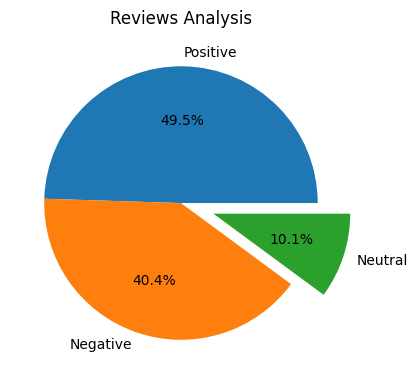

In [27]:
# visual representation of the analysis using plotlib:

import matplotlib.pyplot as plt
# create the plots in this notebook
%matplotlib inline
# create a new figure object with specified size
plt.figure(figsize=(15,7))
# add a subplot to the figure
plt.subplot(1,3,2)
# title the figure
plt.title("Reviews Analysis")
# create a pie chart
plt.pie(vader_counts.values, labels = vader_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [28]:
# push your cleaned data to the csv file
df.to_csv('../Dataset/BA_reviews.csv')

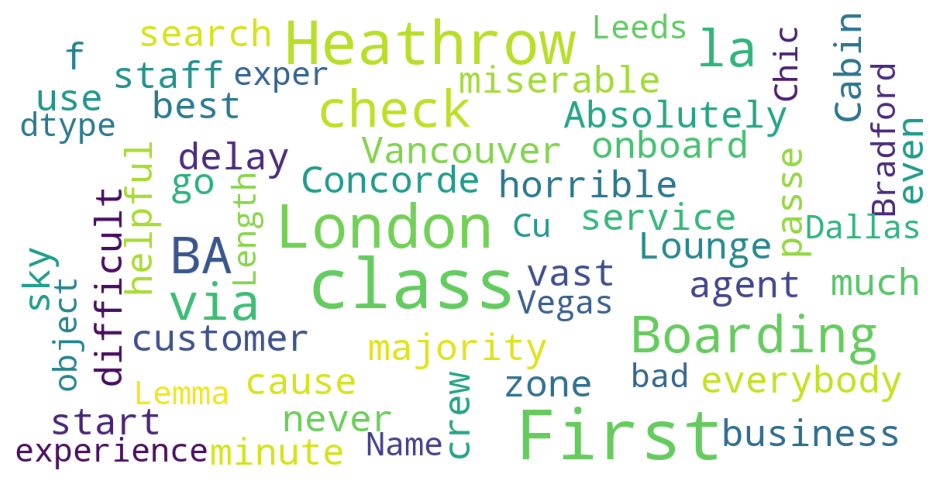

In [29]:
# Create a word cloud for visualising the tages:
from wordcloud import WordCloud, STOPWORDS
# create a set of stopword using predefined stopwords from wordcloud
stopwords = set(STOPWORDS)
# create a function that takes data as input
def show_wordcloud(data):
    # create a wordcloud object withb these parameters:
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    # generate the wordcloud from the data 
    wordcloud=wordcloud.generate(str(data))
    # create a figure with a specified size 
    fig = plt.figure(1, figsize=(12, 12))
    # remove the axis from the plot
    plt.axis('off')
    # display the wordcloud image:
    plt.imshow(wordcloud)
    plt.show()
# use the function on the df.Lemma as the input
show_wordcloud(df.Lemma)